## Reading dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import re


data = pd.read_csv('airline_sentiment_analysis.csv')
data.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


### Taking out feature and label columns

In [2]:
data = data[['text', 'airline_sentiment']]
data.head()

,text,airline_sentiment
0,@VirginAmerica plus you've added commercials t...,positive
1,@VirginAmerica it's really aggressive to blast...,negative
2,@VirginAmerica and it's a really big bad thing...,negative
3,@VirginAmerica seriously would pay $30 a fligh...,negative
4,"@VirginAmerica yes, nearly every time I fly VX...",positive


### Checking null values

In [3]:
data.isna().sum()

text                 0
airline_sentiment    0
dtype: int64

### Observing distribution of different label classes

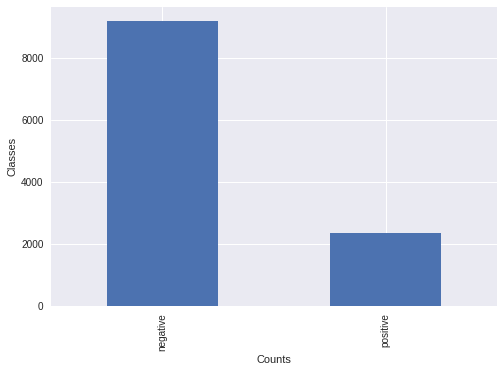

In [4]:
plt.style.use('seaborn')
data['airline_sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Counts')
plt.ylabel('Classes')
plt.show()

### Splitting data x -> features and y -> label

In [5]:
X, y = data['text'], data['airline_sentiment']

## Creating BoW corpus

In [6]:
import spacy
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer

In [7]:
nlp = spacy.load('en')

# STOP_words = set(stopwords.words('english'))
# wl = WordNetLemmatizer()

def create_corpus(data):
    corpus = []
    for sent in data:
#         print()
#         print(sent)
#         print()
        tokens = nlp(sent.lower())
        
        words = []
        for token in tokens:
            lemma = token.lemma_
            if not (token.is_punct or token.is_space or not lemma.isalnum() or lemma.isnumeric()):
                words.append(lemma)

        text = " ".join(words)
        corpus.append(text)
#         print(text)
    return corpus

In [8]:
corpus = create_corpus(X)

### Let's see corpus created

In [9]:
for i in range(10):
        print('Class:', y[i])
        print('Original tweet:', X[i])
        print('Resultant tweet:', corpus[i])
        print()        

Class: positive
Original tweet: @VirginAmerica plus you've added commercials to the experience... tacky.
Resultant tweet: plus have add commercial to the experience tacky

Class: negative
Original tweet: @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
Resultant tweet: be really aggressive to blast obnoxious entertainment in guest face amp have little recourse

Class: negative
Original tweet: @VirginAmerica and it's a really big bad thing about it
Resultant tweet: and be a really big bad thing about

Class: negative
Original tweet: @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA
Resultant tweet: seriously would pay a flight for seat that do not have this playing be really the only bad thing about fly va

Class: positive
Original tweet: @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
Resultan

### Checking length of resultant sentences

In [10]:
from collections import Counter
Counter(len(resultant_sent.split()) for resultant_sent in corpus)

Counter({8: 276,
         14: 525,
         22: 681,
         6: 284,
         11: 402,
         10: 354,
         23: 549,
         1: 154,
         20: 851,
         25: 244,
         2: 148,
         15: 562,
         4: 209,
         18: 754,
         16: 634,
         26: 134,
         17: 676,
         13: 466,
         7: 280,
         5: 235,
         19: 850,
         12: 415,
         21: 850,
         9: 337,
         3: 185,
         24: 393,
         28: 24,
         27: 61,
         30: 1,
         29: 5,
         31: 2})

In [11]:
# making sure there is at least one word for every resultant sentence in corpus
count = 0
for i in range(len(corpus)):
    if len(corpus[i].split()) == 0:
        print('Class:', y[i])
        print('Original tweet:', X[i])
        print('Resultant tweet:', corpus[i])
        count += 1
        print()

if count == 0:
    print('So, now every resultant tweet has at least one word')

So, now every resultant tweet has at least one word


## Creating tokens using keras 

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

In [13]:
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

In [14]:
total_words = len(tokenizer.word_index)
print('Total words in corpus', total_words)

Total words in corpus 8658


### Let's see what transformations we have done

In [15]:
for i in range(10):
    print(corpus[i])
    print(sequences[i])
    for word in corpus[i].split():
        print(word, tokenizer.word_index[word])
    print()

plus have add commercial to the experience tacky
[469, 11, 317, 1123, 2, 3, 129, 4125]
plus 469
have 11
add 317
commercial 1123
to 2
the 3
experience 129
tacky 4125

be really aggressive to blast obnoxious entertainment in guest face amp have little recourse
[1, 108, 2434, 2, 1829, 2985, 780, 12, 1664, 864, 49, 11, 399, 1830]
be 1
really 108
aggressive 2434
to 2
blast 1829
obnoxious 2985
entertainment 780
in 12
guest 1664
face 864
amp 49
have 11
little 399
recourse 1830

and be a really big bad thing about
[9, 1, 6, 108, 322, 62, 227, 69]
and 9
be 1
a 6
really 108
big 322
bad 62
thing 227
about 69

seriously would pay a flight for seat that do not have this playing be really the only bad thing about fly va
[312, 59, 122, 6, 5, 8, 70, 16, 13, 7, 11, 22, 4126, 1, 108, 3, 105, 62, 227, 69, 48, 1542]
seriously 312
would 59
pay 122
a 6
flight 5
for 8
seat 70
that 16
do 13
not 7
have 11
this 22
playing 4126
be 1
really 108
the 3
only 105
bad 62
thing 227
about 69
fly 48
va 1542

yes nearly e

In [16]:
X_train, X_test, y_train, y_test = train_test_split(sequences, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size =0.2)

In [17]:
classes = np.unique(y_train)
get_class_wise_count = lambda data:[np.where(data==cls,1, 0).sum() for cls in classes]

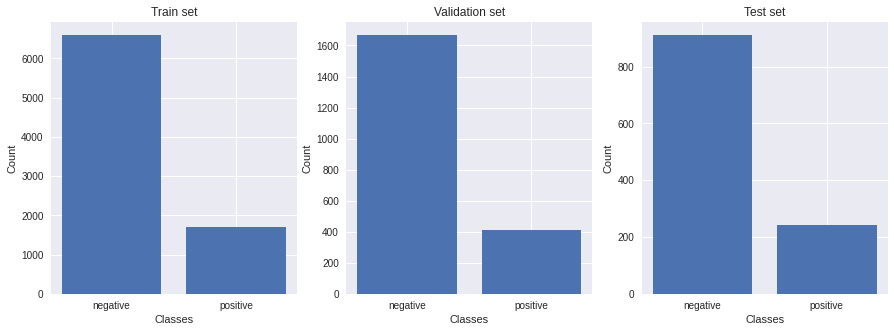

In [18]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
    

plt.subplot(1,3, 1)
plt.bar(classes, get_class_wise_count(y_train))
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Train set')

plt.subplot(1,3,2)
plt.bar(classes, get_class_wise_count(y_val))
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Validation set')

plt.subplot(1,3,3)
plt.bar(classes, get_class_wise_count(y_test))
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Test set')
plt.show()

In [19]:
X_train = tokenizer.sequences_to_matrix(X_train, mode='count')
X_val = tokenizer.sequences_to_matrix(X_val, mode='count')
X_test = tokenizer.sequences_to_matrix(X_test, mode='count')

In [20]:
from scipy import sparse
X_train = sparse.csr_matrix(X_train)
X_val = sparse.csr_matrix(X_val)
X_test = sparse.csr_matrix(X_test)

In [21]:
X_train.shape, X_test.shape, X_val.shape

((8308, 8659), (1155, 8659), (2078, 8659))

In [22]:
y_train.shape, y_test.shape, y_val.shape

((8308,), (1155,), (2078,))

## Prediction using different classification algorithms (Not deep neural networks)

In [23]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier as DCT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import confusion_matrix, roc_curve, classification_report

In [24]:
classifiers = [LR(random_state=0),
               KNN(), 
               SVC(random_state=0, probability=True), 
               DCT(random_state=0), 
               RF(random_state=0), 
               MultinomialNB()]
classifier_names = ['Logistic', 'KNN', 'SVM', 'DecisionTree', 'RandomForest', 'MultinomialBayes']

In [25]:
for index in range(len(classifiers)):
    
    classifier = classifiers[index]
    # Buiding model & prediting for test set
    classifier.fit(X_train, y_train)
    test_prediction = classifier.predict(X_test)
    
    
    print('<<<<<<<<<<<',classifier_names[index],'>>>>>>>>>>>','\n')
    print(f'Confusion matrix:\n {confusion_matrix(y_test, test_prediction)}\n')
    print(f'Classification report:\n {classification_report(y_test, test_prediction)}')

<<<<<<<<<<< Logistic >>>>>>>>>>> 

Confusion matrix:
 [[886  26]
 [ 55 188]]

Classification report:
               precision    recall  f1-score   support

    negative       0.94      0.97      0.96       912
    positive       0.88      0.77      0.82       243

    accuracy                           0.93      1155
   macro avg       0.91      0.87      0.89      1155
weighted avg       0.93      0.93      0.93      1155

<<<<<<<<<<< KNN >>>>>>>>>>> 

Confusion matrix:
 [[731 181]
 [ 56 187]]

Classification report:
               precision    recall  f1-score   support

    negative       0.93      0.80      0.86       912
    positive       0.51      0.77      0.61       243

    accuracy                           0.79      1155
   macro avg       0.72      0.79      0.74      1155
weighted avg       0.84      0.79      0.81      1155

<<<<<<<<<<< SVM >>>>>>>>>>> 

Confusion matrix:
 [[894  18]
 [ 84 159]]

Classification report:
               precision    recall  f1-score   supp

In [26]:
total_words = len(tokenizer.word_index)
total_words

8658

### Defining max sequence length and embedding dimension for a word

In [27]:
max_seq_len = 30
embed_num_dims = 100

In [28]:
padded_seq = pad_sequences(sequences, maxlen=max_seq_len)
padded_seq

array([[   0,    0,    0, ...,    3,  129, 4125],
       [   0,    0,    0, ...,   11,  399, 1830],
       [   0,    0,    0, ...,   62,  227,   69],
       ...,
       [   0,    0,    0, ...,    5,    2,  398],
       [   0,    0,    0, ..., 1331,   30,  736],
       [   0,    0,    0, ...,   21,   46, 1621]], dtype=int32)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(padded_seq, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size =0.2)

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

In [31]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((8308, 30), (8308,), (2078, 30), (2078,))

## Creating deep neural network model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM, Embedding, Bidirectional
from tensorflow.keras import callbacks


model = Sequential()

model.add(Embedding(input_dim=total_words + 1, output_dim=embed_num_dims, input_length=max_seq_len))
model.add(Bidirectional(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 30, 100)           865900    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 30, 256)           234496    
_________________________________________________________________
dense_1 (Dense)              (None, 30, 1)             257       
Total params: 1,100,653
Trainable params: 1,100,653
Non-trainable params: 0
_________________________________________________________________


In [49]:
epochs = 20

call_back = [callbacks.ModelCheckpoint(filepath='airline_twitter_sentiment.hdf5', 
                              save_best_only=True, monitor='val_accuracy', mode='max', verbose=1),
             callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, min_delta=1e-4, mode='max')]

model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=epochs, callbacks=call_back)

Epoch 1/20
130/130 [==============================] - ETA: 0s - loss: 0.3713 - accuracy: 0.8502
Epoch 00001: val_accuracy improved from -inf to 0.90027, saving model to airline_twitter_sentiment.hdf5
130/130 [==============================] - 9s 71ms/step - loss: 0.3713 - accuracy: 0.8502 - val_loss: 0.2615 - val_accuracy: 0.9003
Epoch 2/20
130/130 [==============================] - ETA: 0s - loss: 0.1721 - accuracy: 0.9378
Epoch 00002: val_accuracy improved from 0.90027 to 0.91540, saving model to airline_twitter_sentiment.hdf5
130/130 [==============================] - 9s 66ms/step - loss: 0.1721 - accuracy: 0.9378 - val_loss: 0.2175 - val_accuracy: 0.9154
Epoch 3/20
130/130 [==============================] - ETA: 0s - loss: 0.1181 - accuracy: 0.9612
Epoch 00003: val_accuracy did not improve from 0.91540
130/130 [==============================] - 9s 69ms/step - loss: 0.1181 - accuracy: 0.9612 - val_loss: 0.2722 - val_accuracy: 0.9077
Epoch 4/20
130/130 [==============================

In [50]:
result = model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 7ms/step - loss: 0.2989 - accuracy: 0.9174


In [51]:
print('test loss:', result[0], 'test accuracy:', result[1])

test loss: 0.29890361428260803 test accuracy: 0.9174314141273499


In [52]:
result = model.predict(X_test)

In [53]:
result 

array([[[1.7231703e-04],
        [1.7294288e-04],
        [1.7547607e-04],
        ...,
        [1.0991510e-05],
        [2.0325086e-05],
        [6.4463879e-05]],

       [[1.7592907e-03],
        [1.8792152e-03],
        [2.0284355e-03],
        ...,
        [9.8562241e-04],
        [8.2582235e-04],
        [7.1218610e-04]],

       [[3.2014847e-03],
        [3.4117103e-03],
        [3.6717057e-03],
        ...,
        [5.3840876e-04],
        [1.4740229e-04],
        [8.0400705e-04]],

       ...,

       [[1.8882751e-04],
        [1.8969178e-04],
        [1.9216537e-04],
        ...,
        [2.8336203e-06],
        [1.3967881e-05],
        [6.8956438e-06]],

       [[1.5773177e-03],
        [1.6849041e-03],
        [1.8192232e-03],
        ...,
        [3.3204257e-03],
        [2.6432902e-02],
        [6.5103173e-04]],

       [[3.1033158e-04],
        [3.2079220e-04],
        [3.3539534e-04],
        ...,
        [6.6490902e-05],
        [1.0148635e-04],
        [2.0604777e-05]]

In [54]:
result = result.flatten()
result = np.where(result >= 0.5, 1, 0)

In [55]:
report = classification_report(y_test, result, target_names=classes)

ValueError: Found input variables with inconsistent numbers of samples: [1155, 34650]

In [ ]:
print('<<<<<<<<<<<',"Using deep neural network",'>>>>>>>>>>>','\n')
print(confusion_matrix(y_test, result))
print(report)